### **Tarea: Factorización de Matrices** ###

Mstemáticas y Estadística para Inteligencia Artificial

**Alumno**: Aminadab Córdova Acosta


Instrucciones

En la siguiente actividad de Geogebra se le asignará una matriz A. Para dicha matriz:

- Obtenga, por medio de transformaciones elementales, una matriz B que sea de diagonal predominante
- Obtenga la factorización LU de la matriz B
- Obtenga la factorización QR de la matriz B
- Obtenga la factorización en valores singulaes de la matriz B
- Compare los resultados obtenidos con las factorizaciones que se muestran en la actividad de Geogebra


**Captura de Geogebra**

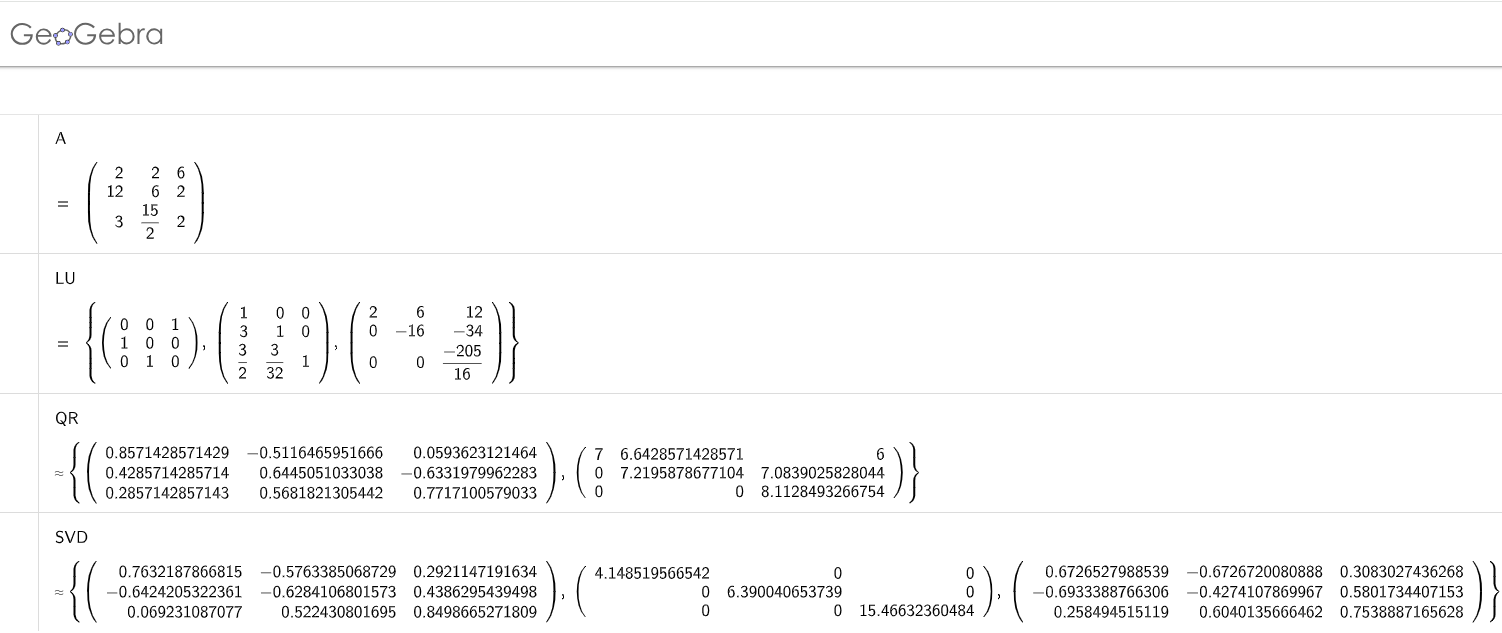

In [2]:
# Importar librerias requeridas
import sympy as sp
import numpy as np
import pandas as pd
from scipy.linalg import lu, qr, svd
from IPython.display import display

In [12]:
# Definir la matriz simbólica A
A = sp.Matrix([
    [2, 2, 6],
    [12, 6, 2],
    [3, sp.Rational(15, 2), 2]
])

# Mostrar la matriz A
print("Matriz A:")
A

Matriz A:


Matrix([
[ 2,    2, 6],
[12,    6, 2],
[ 3, 15/2, 2]])

**1.Obtenga, por medio de transformaciones elementales, una matriz B que sea de diagonal predominante**

In [13]:
# Crear una copia para modificarla
B = A.copy()

# Intercambiar filas para hacerla diagonalmente predominante
B.row_swap(0, 1)  # Intercambiar fila 1 con fila 2
B.row_swap(1, 2)  # Intercambiar fila 2 con fila 3

# Mostrar la nueva matriz
print("Matriz B con diagonal predominante:")
B

Matriz B con diagonal predominante:


Matrix([
[12,    6, 2],
[ 3, 15/2, 2],
[ 2,    2, 6]])

**2. Obtenga la factorización LU de la matriz B**

In [ ]:
# Factorización LU con SymPy
L, U, _ = B.LUdecomposition()

# Mostrar factorización LU
print("Factorización LU:\n")
print("L =")
display(L)

print("U =")
display(U)

Factorización LU:

L =


Matrix([
[  1,   0, 0],
[1/4,   1, 0],
[1/6, 1/6, 1]])

U =


Matrix([
[12, 6,     2],
[ 0, 6,   3/2],
[ 0, 0, 65/12]])

In [6]:
# Multiplicar L y U para verificar la factorización
LU_product = L * U

# Mostrar el resultado
print("\nL * U:")
LU_product


L * U:


Matrix([
[12,    6, 2],
[ 3, 15/2, 2],
[ 2,    2, 6]])

Se verifica que al multiplicar las matrices L y U, se obtiene la matriz B.  

In [7]:
B

Matrix([
[12,    6, 2],
[ 3, 15/2, 2],
[ 2,    2, 6]])

**3. Obtenga la factorización QR de la matriz B**

In [ ]:
# Factorización QR con SymPy
Q, R = B.QRdecomposition()

# Mostrar factorización QR
print("Factorización QR:\n")
print("Q =")
display(Q)

print("R =")
display(R)

Factorización QR:

Q =


Matrix([
[12*sqrt(157)/157, -80*sqrt(94357)/94357, -3*sqrt(601)/601],
[ 3*sqrt(157)/157, 294*sqrt(94357)/94357, -4*sqrt(601)/601],
[ 2*sqrt(157)/157,  39*sqrt(94357)/94357, 24*sqrt(601)/601]])

R =


Matrix([
[sqrt(157), 197*sqrt(157)/314,      42*sqrt(157)/157],
[        0, 3*sqrt(94357)/157, 662*sqrt(94357)/94357],
[        0,                 0,     130*sqrt(601)/601]])

In [9]:
# Multiplicar Q y R para verificar la factorización
QR_product = Q * R

# Mostrar el resultado
print("\nQ * R:")
QR_product


Q * R:


Matrix([
[12,    6, 2],
[ 3, 15/2, 2],
[ 2,    2, 6]])

Se verifica que al multiplicar las matrices Q y R, se obtiene la matriz B.  

In [10]:
B

Matrix([
[12,    6, 2],
[ 3, 15/2, 2],
[ 2,    2, 6]])

**4. Obtenga la factorización en valores singulares de la matriz B**

In [43]:
# Convertir la matriz B a formato NumPy para SVD
B_np = np.array(B).astype(np.float64)

# Factorización SVD con NumPy
U, S, Vt = svd(B_np)

print("\nFactorización SVD:")
print("U =", U)
print("S =", S)
print("V^T =", Vt)


Factorización SVD:
U = [[-0.84485447  0.48378397  0.22841627]
 [-0.45835318 -0.43433626 -0.77541239]
 [-0.27592262 -0.75980595  0.58869485]]
S = [15.6777194   5.68344731  4.37693283]
V^T = [[-0.76957356 -0.57780221 -0.27184764]
 [ 0.52482003 -0.32980512 -0.78472449]
 [ 0.3637588  -0.74657431  0.55705147]]


In [26]:
# Convertir S en una matriz diagonal Σ
Sigma = np.zeros((3, 3))  # Crear matriz de ceros del mismo tamaño que B
np.fill_diagonal(Sigma, S)  # Llenar la diagonal con los valores de S

# Reconstrucción de B
B_reconstructed = U @ Sigma @ Vt  # Multiplicación de matrices

# Imprimir los resultados
print("Matriz original B:\n", B)
print("\nMatriz reconstruida B_reconstructed:\n", B_reconstructed)

# Verificar si son iguales
print("\n¿La reconstrucción es correcta?", np.allclose(B_np, B_reconstructed))

Matriz original B:
 Matrix([[12, 6, 2], [3, 15/2, 2], [2, 2, 6]])

Matriz reconstruida B_reconstructed:
 [[12.   6.   2. ]
 [ 3.   7.5  2. ]
 [ 2.   2.   6. ]]

¿La reconstrucción es correcta? True


**5. Compare los resultados obtenidos con las factorizaciones que se muestran en la actividad de Geogebra**